In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("HVAC Energy Data.csv")

In [5]:
df.tail()

,Local Time (Timezone : GMT+8h),Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
13610,6/1/2020 11:00,108.6,33.4,579.9,132.8,84,75,74,5,29.89
13611,6/1/2020 11:30,108.9,33.2,567.3,128.6,84,75,74,6,29.89
13612,6/1/2020 12:00,108.7,33.0,561.7,125.7,82,75,79,6,29.89
13613,6/1/2020 12:30,108.8,33.2,566.0,127.3,82,77,84,3,29.86
13614,6/1/2020 13:00,108.7,33.3,569.7,129.0,82,75,79,5,29.86


In [6]:
df.head()

,Local Time (Timezone : GMT+8h),Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
0,8/18/2019 0:00,85.6,31.4,479.6,116.2,82,75,79,13,29.83
1,8/18/2019 0:30,84.3,31.1,460.3,114.5,82,75,79,12,29.83
2,8/18/2019 1:00,84.6,31.3,462.4,116.8,82,75,79,12,29.83
3,8/18/2019 1:30,84.8,31.4,458.5,117.0,82,75,79,12,29.83
4,8/18/2019 2:00,84.7,31.4,455.4,117.0,82,75,79,12,29.83


In [7]:
#Rows,Columns
df.shape

(13615, 10)

In [8]:
df.columns

Index(['Local Time (Timezone : GMT+8h)', 'Chilled Water Rate (L/sec)',
       'Cooling Water Temperature (C)', 'Building Load (RT)',
       'Chiller Energy Consumption (kWh)', 'Outside Temperature (F)',
       'Dew Point (F)', 'Humidity (%)', 'Wind Speed (mph)', 'Pressure (in)'],
      dtype='object')

In [9]:
#Column Data Types
df.dtypes

Local Time (Timezone : GMT+8h)       object
Chilled Water Rate (L/sec)          float64
Cooling Water Temperature (C)       float64
Building Load (RT)                  float64
Chiller Energy Consumption (kWh)    float64
Outside Temperature (F)               int64
Dew Point (F)                         int64
Humidity (%)                          int64
Wind Speed (mph)                      int64
Pressure (in)                       float64
dtype: object

In [10]:
#Checking if there are any missing values 
df.isnull().sum()
#No missing values so I do not have to use dropna

Local Time (Timezone : GMT+8h)      0
Chilled Water Rate (L/sec)          0
Cooling Water Temperature (C)       0
Building Load (RT)                  0
Chiller Energy Consumption (kWh)    0
Outside Temperature (F)             0
Dew Point (F)                       0
Humidity (%)                        0
Wind Speed (mph)                    0
Pressure (in)                       0
dtype: int64

In [11]:
df.describe

<bound method NDFrame.describe of       Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0                     8/18/2019 0:00                        85.6   
1                     8/18/2019 0:30                        84.3   
2                     8/18/2019 1:00                        84.6   
3                     8/18/2019 1:30                        84.8   
4                     8/18/2019 2:00                        84.7   
...                              ...                         ...   
13610                 6/1/2020 11:00                       108.6   
13611                 6/1/2020 11:30                       108.9   
13612                 6/1/2020 12:00                       108.7   
13613                 6/1/2020 12:30                       108.8   
13614                 6/1/2020 13:00                       108.7   

       Cooling Water Temperature (C)  Building Load (RT)  \
0                               31.4               479.6   
1                            

In [12]:
df['Local Time (Timezone : GMT+8h)'] = pd.to_datetime(df['Local Time (Timezone : GMT+8h)'])

In [34]:
df['year'] = df['Local Time (Timezone : GMT+8h)'].dt.year
df['month'] = df['Local Time (Timezone : GMT+8h)'].dt.month
df['DayOfWeek'] = df['Local Time (Timezone : GMT+8h)'].dt.dayofweek
df['Hour'] = df['Local Time (Timezone : GMT+8h)'].dt.hour

In [35]:
X = df[
['Chilled Water Rate (L/sec)',
     'Cooling Water Temperature (C)',
     'Building Load (RT)',
     'Outside Temperature (F)',
     'Dew Point (F)',
     'Humidity (%)',
     'Wind Speed (mph)',
     'Pressure (in)',
     'Hour',
     'DayOfWeek',
     'month']]

In [15]:
y = df['Chiller Energy Consumption (kWh)']

In [16]:
#Train and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = LinearReg.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [20]:
print("Linear Regression Results:")
print("MAE  =", mae)
print("RMSE =", rmse)
print("R² Score =", r2)

Linear Regression Results:
MAE  = 8.668997081846967
RMSE = 10.777428971206662
R² Score = 0.8803632997193256


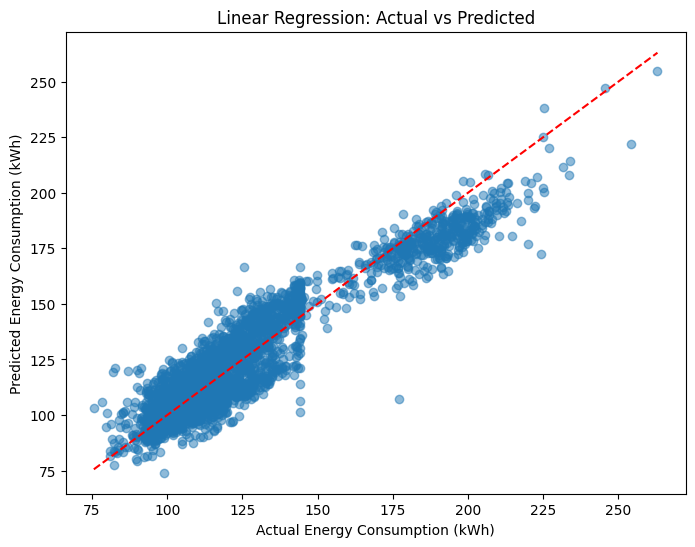

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf = RandomForestRegressor(
    n_estimators=200,  
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1
)

In [24]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [25]:
rf_pred = rf.predict(X_test)

In [26]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

In [27]:
print("Random Forest Results:")
print("MAE  =", rf_mae)
print("RMSE =", rf_rmse)
print("R² Score =", rf_r2)


Random Forest Results:
MAE  = 2.7693483133099
RMSE = 4.659055456958411
R² Score = 0.9776421598201658


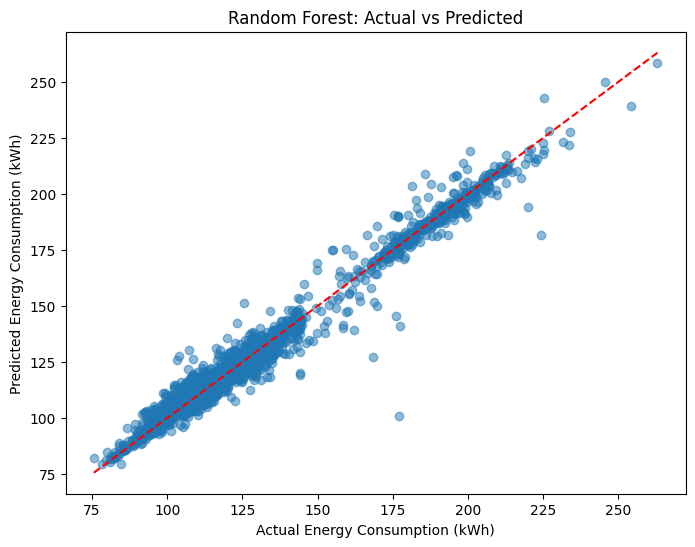

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

Demo Date: 2019-08-18 01:00:00
Actual Energy: 116.80 kWh
Predicted Energy: 116.67 kWh
Absolute Error: 0.13 kWh
Percentage Error: 0.11%


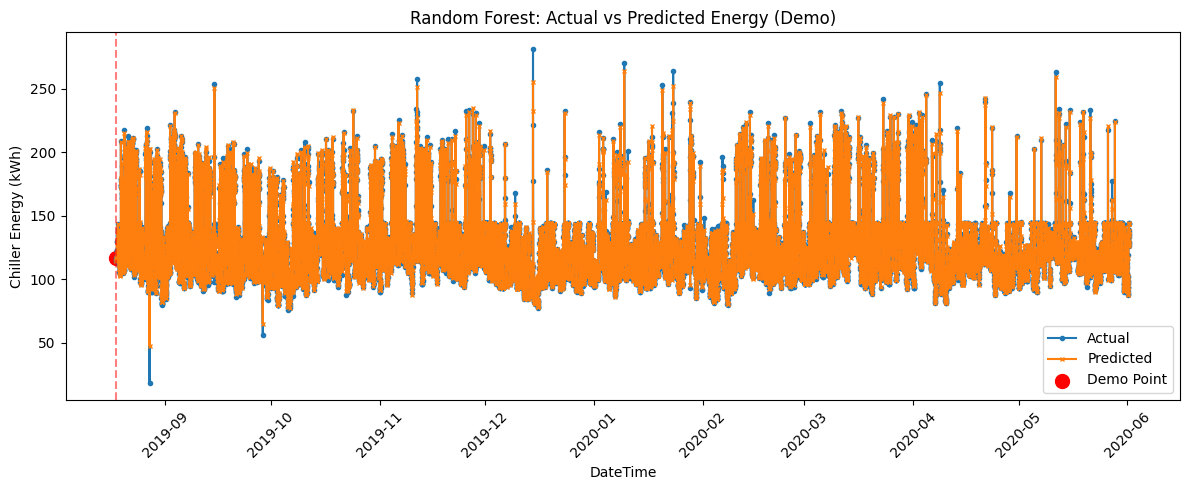

In [42]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

df['Predicted_Energy'] = rf_model.predict(X)

demo_date = pd.to_datetime('8/18/2019 1:00', format='%m/%d/%Y %H:%M')
row = df[df['Local Time (Timezone : GMT+8h)'] == demo_date]

if not row.empty:
    actual = row['Chiller Energy Consumption (kWh)'].values[0]
    predicted = row['Predicted_Energy'].values[0]
    abs_error = abs(actual - predicted)
    percent_error = abs_error / actual * 100

    print(f"Demo Date: {demo_date}")
    print(f"Actual Energy: {actual:.2f} kWh")
    print(f"Predicted Energy: {predicted:.2f} kWh")
    print(f"Absolute Error: {abs_error:.2f} kWh")
    print(f"Percentage Error: {percent_error:.2f}%")
else:
    print("Demo date not found in dataset")


plt.figure(figsize=(12,5))
plt.plot(df['Local Time (Timezone : GMT+8h)'], df['Chiller Energy Consumption (kWh)'], 
         label='Actual', marker='o', markersize=3)
plt.plot(df['Local Time (Timezone : GMT+8h)'], df['Predicted_Energy'], 
         label='Predicted', marker='x', markersize=3)
plt.scatter(demo_date, predicted, color='red', s=100, label='Demo Point')  
plt.axvline(x=demo_date, color='r', linestyle='--', alpha=0.5)
plt.xlabel('DateTime')
plt.ylabel('Chiller Energy (kWh)')
plt.title('Random Forest: Actual vs Predicted Energy (Demo)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
